In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Our problem for now deals only with rectangular objects.

To test a possible definition for a distance between two rectangles, the following blue rectangle is used as reference to measure the distance to other objects

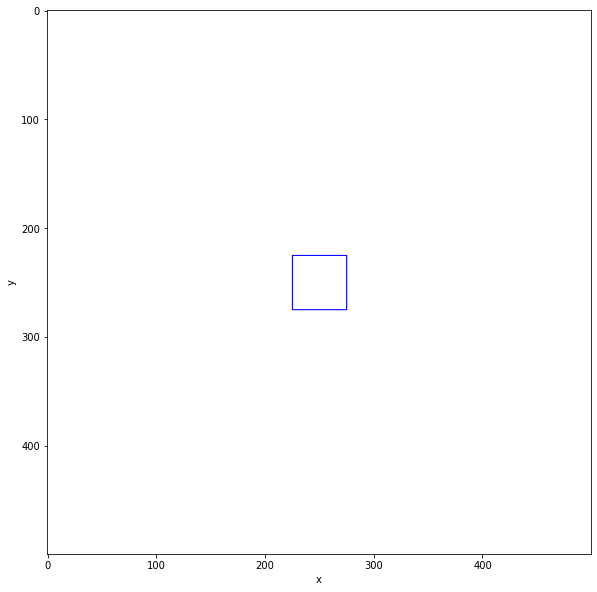

In [2]:
blank = 255*np.ones(shape=[500, 500, 3], dtype=np.uint8)

c1 = (225,225)
c2 = (275,275)

cv2.rectangle(blank, pt1 = c1, pt2 = c2, color=(0,0,255), thickness=1)

plt.figure(figsize = (10,10))
plt.imshow(blank)
plt.xlabel('x')
plt.ylabel('y');

To measure the distance the main idea initially is to identify where the other objects are with relation to the references. There are eight areas where the other objects could be located

In [3]:
def dotted_line(image, pt1, pt2, color, thickness, l_inter, l_length):
    tmp_dvec = [pt2[0] - pt1[0], pt2[1] - pt1[1]]
    tmp_norm = np.linalg.norm(tmp_dvec)
    dvec = [tmp_dvec[0]/tmp_norm, tmp_dvec[1]/tmp_norm]
    current_point = pt1
    current_length = 0
    flg = 1
    
    tot_length = np.linalg.norm([pt1[0]-pt2[0], pt1[1]-pt2[1]])
    
    while True:
        
        if flg:
            next_point = (current_point[0] + l_length*dvec[0], current_point[1] + l_inter*dvec[1])
            current_point_int = tuple(map(lambda x: int(round(x)), current_point))
            next_point_int = tuple(map(lambda x: int(round(x)), next_point))
            cv2.line(blank, pt1 = current_point_int, pt2 = next_point_int, color = color, thickness = thickness)
            current_length += l_length
            flg = 0
        else:
            next_point = (current_point[0] + l_inter*dvec[0], current_point[1] + l_inter*dvec[1])
            current_length += l_inter
            flg = 1
            
        current_point = next_point
        if (tot_length < current_length + l_inter) | (tot_length < current_length + l_length):
            if flg:
                current_point_int = tuple(map(lambda x: int(round(x)), current_point))
                cv2.line(blank, pt1 = current_point_int, pt2 = pt2, color = color, thickness = thickness)
            break
            

The areas and the number of the areas are the following

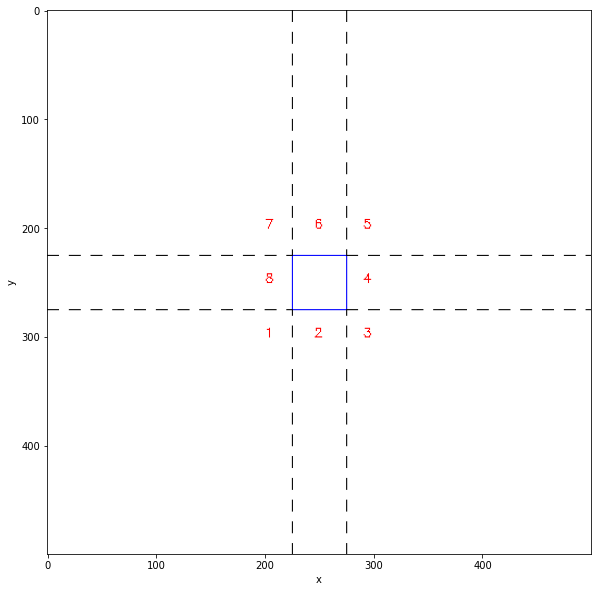

In [4]:
blank = 255*np.ones(shape=[500, 500, 3], dtype=np.uint8)

c1 = (225,225)
c12 = (225,275)
c2 = (275,275)
c21 = (275,225)

cv2.rectangle(blank, pt1 = c1, pt2 = c2, color = (0,0,255), thickness = 1)

dotted_line(blank, (0,c1[1]), c1, (0,0,0), 1, 10, 10)
dotted_line(blank, (c1[0],0), c1, (0,0,0), 1, 10, 10)
dotted_line(blank, (0,c12[1]), c12, (0,0,0), 1, 10, 10)
dotted_line(blank, (c12[0],500), c12, (0,0,0), 1, 10, 10)
dotted_line(blank, c21, (500, c21[1]), (0,0,0), 1, 10, 10)
dotted_line(blank, (c21[0],0), c21, (0,0,0), 1, 10, 10)
dotted_line(blank, c2, (500, c2[1]), (0,0,0), 1, 10, 10)
dotted_line(blank, (c2[0],500), c2, (0,0,0), 1, 10, 10)

font = cv2.FONT_HERSHEY_SIMPLEX
fontscale = 0.4
colortext = (255,0,0)

cv2.putText(blank,'7',(200,200), font, fontscale, colortext)
cv2.putText(blank,'6',(245,200), font, fontscale, colortext)
cv2.putText(blank,'5',(290,200), font, fontscale, colortext)
cv2.putText(blank,'4',(290,250), font, fontscale, colortext)
cv2.putText(blank,'3',(290,300), font, fontscale, colortext)
cv2.putText(blank,'2',(245,300), font, fontscale, colortext)
cv2.putText(blank,'1',(200,300), font, fontscale, colortext)
cv2.putText(blank,'8',(200,250), font, fontscale, colortext)

plt.figure(figsize = (10,10))
plt.imshow(blank)
plt.xlabel('x')
plt.ylabel('y');

The red rectangles are used as test objects and the expected distances where calculated previously

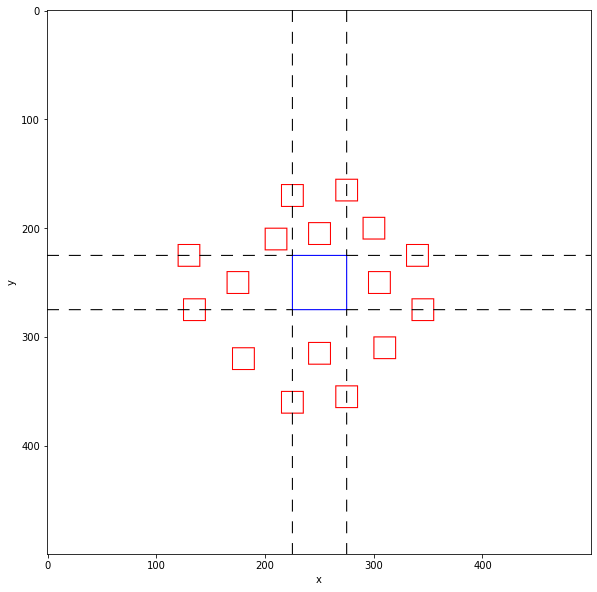

In [5]:
object_list = [
    [200,200,220,220], # 5
    [240,195,260,215], # 10
    [290,190,310,210], # 15
    [295,240,315,260], # 20
    [300,300,320,320], # 25
    [240,305,260,325], # 30
    [170,310,190,330], # 35
    [165,240,185,260], # 40
    [215,160,235,180], # 45
    [265,155,285,175], # 50
    [330,215,350,235], # 55
    [335,265,355,285], # 65
    [265,345,285,365], # 70
    [215,350,235,370], # 75
    [125,265,145,285], # 80
    [120,215,140,235], # 85
]

blank = 255*np.ones(shape=[500, 500, 3], dtype=np.uint8)

c1 = (225,225)
c2 = (275,275)

cv2.rectangle(blank, pt1 = c1, pt2 = c2, color=(0,0,255), thickness=1)

for o in object_list:
    cv2.rectangle(blank, pt1 = (o[0],o[1]), pt2 = (o[2],o[3]), color=(255,0,0), thickness=1)
    
dotted_line(blank, (0,c1[1]), c1, (0,0,0), 1, 10, 10)
dotted_line(blank, (c1[0],0), c1, (0,0,0), 1, 10, 10)
dotted_line(blank, (0,c12[1]), c12, (0,0,0), 1, 10, 10)
dotted_line(blank, (c12[0],500), c12, (0,0,0), 1, 10, 10)
dotted_line(blank, c21, (500, c21[1]), (0,0,0), 1, 10, 10)
dotted_line(blank, (c21[0],0), c21, (0,0,0), 1, 10, 10)
dotted_line(blank, c2, (500, c2[1]), (0,0,0), 1, 10, 10)
dotted_line(blank, (c2[0],500), c2, (0,0,0), 1, 10, 10)
    
plt.figure(figsize = (10,10))
plt.imshow(blank)
plt.xlabel('x')
plt.ylabel('y');

The following is a function that return the number of the block that a box belongs to with respect to a reference box

In [6]:
def get_block(ref_box, other_box):
    rb_left, rb_low, rb_right, rb_upper = ref_box
    ob_left, ob_low, ob_right, ob_upper = other_box
    if ob_right < rb_left:
        if ob_low > rb_upper:
            block = 1
        elif ob_upper < rb_low:
            block = 7
        else:
            block = 8
    elif ob_left > rb_right:
        if ob_low > rb_upper:
            block = 3
        elif ob_upper < rb_low:
            block = 5
        else:
            block = 4
    else:
        if ob_low > rb_upper:
            block = 2
        elif ob_upper < rb_low:
            block = 6
        else:
            block = np.nan
    return block

The block of the boxes can be found

In [9]:
ref_box = [225,225,275,275]


for other_box in object_list:
    print(get_block(ref_box, other_box), end =',')

7,6,5,4,3,2,1,8,6,6,4,4,2,2,8,8,